In [1]:
import pandas as pd
import numpy as np 
import scipy as sc
import datetime
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

   
In questo Jupyter notebook abbiamo studiato e analizzato il comportamento dell' host di Solari durante 6 giorni: dal 31/10 fino al 5/11.Il nostro lavoro sarà suddiviso in due Macro parti:   

    Part1: IIN=0 (l'illuminazione pubblica è spenta)

    Part2: IIN>100 mA  (l'illuminazione pubblica non è spenta)


### Lettura dei dati durante 6 giorni

In [2]:
path_csv='./setimana'
colum=['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'JP', 'CNT','STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS',
       'PAN1VOLT', 'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'time','date','Batt_id']
my_Data=pd.DataFrame(columns=colum)
for i, file in enumerate(glob.glob(path_csv+"/*.csv")):
    #print(file)
    DF= pd.read_csv(file, sep=';')
    my_Data=my_Data.append(DF,ignore_index=True)

C:\Users\bmakh\anaconda3\envs\Spark\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1- Dataset totale

In [3]:
my_Data = my_Data.rename({'Batt_id': 'host_id'}, axis='columns')
my_Data.head(4)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,JP,CNT,STS,...,BRIGHTNESS,PAN1VOLT,PAN1CURR,BCK1VOLT,BCK1CURR,RSSI,time,date,host_id,Unnamed: 0
0,2020-10-31 00:00:32,29167,618.0,29097.0,29066.0,795.0,265.0,OFF,12497.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,00:00:32,2020-10-31,814U01M70006,0.0
1,2020-10-31 00:01:31,29167,619.0,29097.0,29048.0,576.0,265.0,OFF,12498.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,00:01:31,2020-10-31,814U01M70006,1.0
2,2020-10-31 00:02:30,29166,691.0,29097.0,29065.0,746.0,265.0,OFF,12499.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,00:02:30,2020-10-31,814U01M70006,2.0
3,2020-10-31 00:03:29,29170,643.0,29097.0,29050.0,557.0,265.0,OFF,12500.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,00:03:29,2020-10-31,814U01M70006,3.0


### 1.1- Sostituzione dei valori mancanti con la media di ciascuna colonna del nostro Master Table


In [4]:
my_Data["VIN"] = my_Data["VIN"].fillna(my_Data["VIN"].mean())
my_Data["VIN"]=my_Data["VIN"].astype(int)
my_Data["IIN"] = my_Data["IIN"].fillna(my_Data["IIN"].mean())
my_Data["IIN"]=my_Data["IIN"].astype(int)
my_Data["VOUT"] = my_Data["VOUT"].fillna(my_Data["VOUT"].mean())
my_Data["VOUT"]=my_Data["VOUT"].astype(int)
my_Data["VBATT"] = my_Data["VBATT"].fillna(my_Data["VBATT"].mean())
my_Data["VBATT"]=my_Data["VBATT"].astype(int)
my_Data["IBATT"] = my_Data["IBATT"].fillna(my_Data["IBATT"].mean())
my_Data["IBATT"]=my_Data["IBATT"].astype(int)
my_Data["TEMP"] = my_Data["TEMP"].fillna(my_Data["TEMP"].mean())
my_Data["TEMP"]=my_Data["TEMP"].astype(int)
my_Data["CNT"] = my_Data["CNT"].fillna(my_Data["CNT"].mean())
my_Data["CNT"]=my_Data["CNT"].astype(int)
my_Data["POWER"] = my_Data["POWER"].fillna(my_Data["POWER"].mean())
my_Data["POWER"]=my_Data["POWER"].astype(int)

## Questa è la lista dei giorni che abbiamo studiato 

In [5]:
list_date=[c for c in my_Data.date.unique()]
list_date

['2020-10-31',
 '2020-11-01',
 '2020-11-02',
 '2020-11-03',
 '2020-11-04',
 '2020-11-05']

In [6]:
my_Data.shape[0]

6002960

In [7]:
dati=my_Data[['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT',  'POWER', 'time', 'date', 'host_id']]

### 1.2- Correlazione tra le varie caratteristiche e la temperatura del nostro Master Table


<AxesSubplot:title={'center':'dataset totale'}>

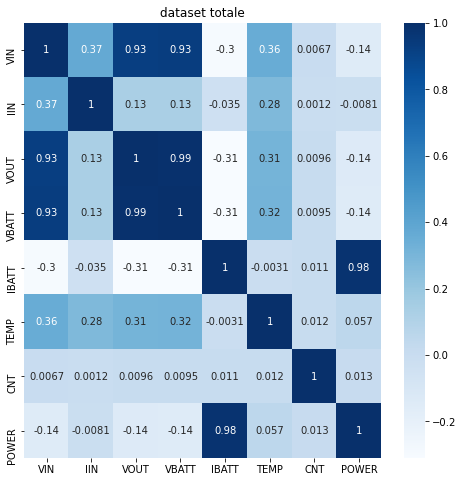

In [8]:
# master_table correlation matrix 
# calculate the correlation matrix
corr = dati.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title('dataset totale')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap= 'Blues',ax=ax)

## 2- Part1: IN=0 (cioè illuminazione pubblica spenta)

Selezioniamo le osservazioni che hanno soddisfatto la condizione IIN=0 nel nostro Master Table (my_Data). Abbiamo trovato che ci sono 2471286 casi su 6002960 :totale dei casi

In [9]:
DF_IIN0=my_Data[my_Data.IIN==0]
Col_IIN0=['DATE', 'VIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP','CNT','POWER', 'time', 'date', 'host_id']
DF_IIN0=DF_IIN0[Col_IIN0]
DF_IIN0.shape[0]

2471286

### 2.1- Corelazione tra vari caratteristiche e la temperatura del nostro Mater Table quando IIN=0

<AxesSubplot:title={'center':'IIN=0'}>

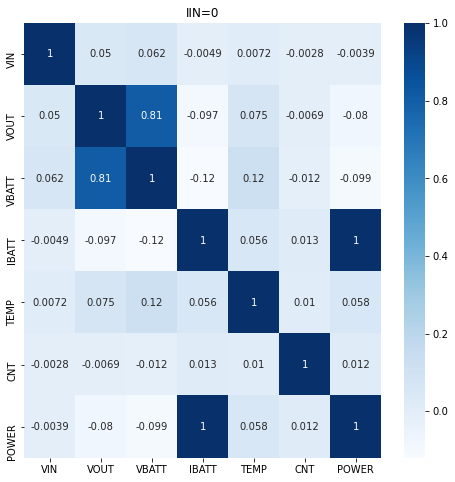

In [10]:
# master_table correlation matrix 
# calculate the correlation matrix
corr1 = DF_IIN0.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title('IIN=0')
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns, annot=True, cmap= 'Blues',ax=ax)

Il seguente boxplot mostra la distribuzione dei dati quantitativi in un modo che faciliti il confronto tra le variabili. Il riquadro mostra i quartili del dataset di dati mentre i baffi si estendono per mostrare il resto della distribuzione, ad eccezione dei punti determinati come "valori anomali"

<AxesSubplot:xlabel='TEMP'>

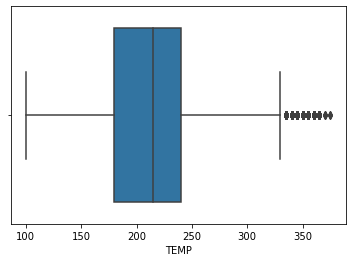

In [11]:
sns.boxplot(x=DF_IIN0['TEMP'])

Abbiamo trovato in questo caso che l'anomalia della temperatura inizia quando il valore è superiore a 32°C, quindi siamo andati a studiare il dataset che presenta valori di temperatura superiori a 32°C.

Abbiamo trovato che ci sono 2312 casi su totale di 2471286. se veda nella cella successiva

In [12]:
Outlier_temp=DF_IIN0[DF_IIN0.TEMP>320]
Outlier_temp

,DATE,VIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
51830,2020-10-31 14:16:45,0,26524,26411,673,325,62949,17774,14:16:45,2020-10-31,814U01M70081
51831,2020-10-31 14:17:45,0,26524,26476,662,325,62950,17527,14:17:45,2020-10-31,814U01M70081
51832,2020-10-31 14:18:44,0,26524,26402,648,325,62951,17108,14:18:44,2020-10-31,814U01M70081
51833,2020-10-31 14:19:43,0,26524,26476,522,325,62952,13820,14:19:43,2020-10-31,814U01M70081
51834,2020-10-31 14:20:42,0,26524,26395,533,325,62953,14068,14:20:42,2020-10-31,814U01M70081
...,...,...,...,...,...,...,...,...,...,...,...
5996542,2020-11-05 14:27:04,0,26441,26486,652,330,371840,17268,14:27:04,2020-11-05,814U01M71142
5996543,2020-11-05 14:28:03,0,26441,26522,763,330,371841,20236,14:28:03,2020-11-05,814U01M71142
5996544,2020-11-05 14:29:02,0,26441,26521,627,330,371842,16628,14:29:02,2020-11-05,814U01M71142
5996545,2020-11-05 14:30:01,0,26441,26511,646,325,371843,17126,14:30:01,2020-11-05,814U01M71142


Il numero degli host che hanno riscontrato questi valori della temperatura (temp>32°C) sono 37 su totale di 730. Si veda nella cella successiva 

In [13]:
c=[ c for c in  Outlier_temp.host_id.unique()]
len(c)

37

Studiando la distribuzione dei valori di : VBATT, VOUT, POWER e IBATT quando la temperatura è superiore à 32°C: i punti neri indicano le ouliers invece il plobox blu indicano la distirbuzione normale. Si veda nei grafici seguenti

<AxesSubplot:xlabel='IBATT'>

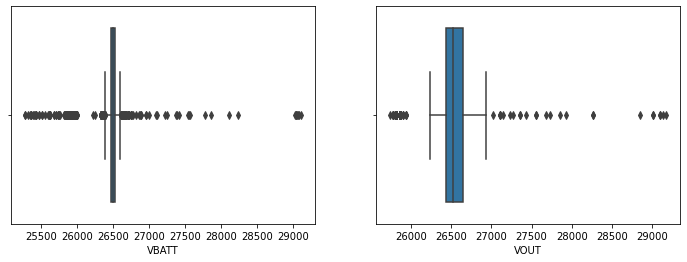

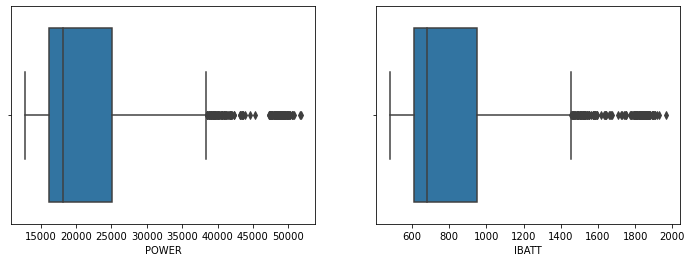

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=Outlier_temp['VBATT'])
plt.subplot(1,2,2)
sns.boxplot(x=Outlier_temp['VOUT'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=Outlier_temp['POWER'])
plt.subplot(1,2,2)
sns.boxplot(x=Outlier_temp['IBATT'])

Studiando la distribuzione dei valori di VIN quando la temperatura è superiore a 32°C: si vede della la cella successiva che VIN è stato sempre nullo tranne 7 casi che sono indicati sotto il grafico

<AxesSubplot:xlabel='VIN'>

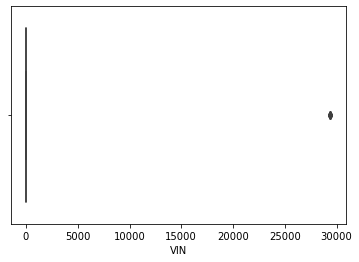

In [15]:
sns.boxplot(x=Outlier_temp['VIN'])

In [17]:
test=Outlier_temp[Outlier_temp['VIN']>29700]
test

,DATE,VIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id


### Tornando al dataset iniziale che corrisponde à IIN=0 per tutte le oservazioni 

Studiando la distribuzione dei valori VBATT, VOUT, POWER e IBATT quando la corrente d'ingresso lato caricabatteria è nulla. I punti indicano le ouliers invece il box blu indica la distirbuzione normale

Text(0.5, 1.0, 'La distribuzione di IBAT mentre IIN=0')

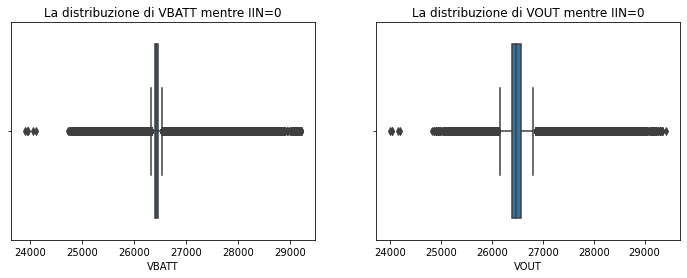

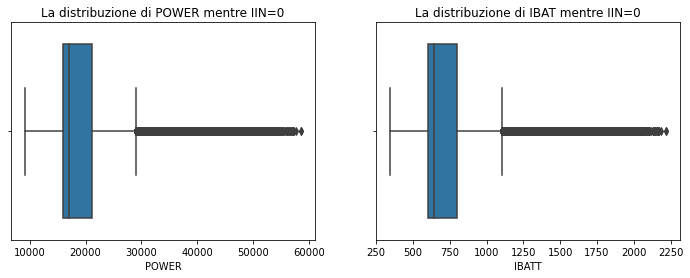

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('La distribuzione di VBATT mentre IIN=0')
sns.boxplot(x=DF_IIN0['VBATT'])
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN0['VOUT'])
plt.title('La distribuzione di VOUT mentre IIN=0')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN0['POWER'])
plt.title('La distribuzione di POWER mentre IIN=0')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN0['IBATT'])
plt.title('La distribuzione di IBAT mentre IIN=0')


La tensione in ingresso lato caricabatterie è stato sempre 0 trane alcuni valori di 'ouliers' indicati con i punti neri

<AxesSubplot:title={'center':'La distribuzione di VIN mentre IIN=0'}, xlabel='VIN'>

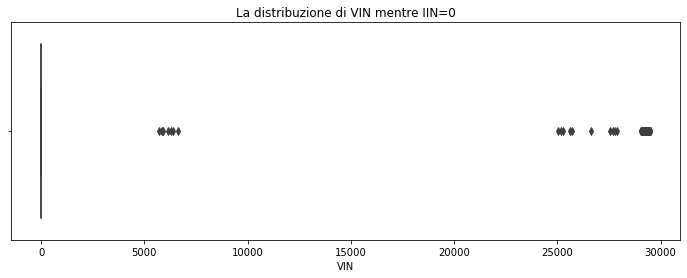

In [19]:
plt.figure(figsize=(12,4))
plt.title('La distribuzione di VIN mentre IIN=0')
sns.boxplot(x=DF_IIN0['VIN'])

#### Abbiamo provato a studiare la distibuzione di VIN, VOUT, POWER e IBATT quando VBATT>28 V e IIN=0 però non abbiamo trovato niente di particolare
Vediamo la cella successiva

In [20]:
VBATT_Greater28=DF_IIN0[DF_IIN0.VBATT>29000]
VBATT_Greater28

,DATE,VIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
66728,2020-10-31 18:54:26,29326,29180,29051,588,325,64902,17081,18:54:26,2020-10-31,814U01M70095
128157,2020-10-31 18:43:18,29365,29014,29067,598,325,199364,17382,18:43:18,2020-10-31,814U01M70173
135007,2020-10-31 11:05:55,0,29097,29137,553,280,6748,16112,11:05:55,2020-10-31,814U01M70180
156281,2020-10-31 18:44:09,29313,29097,29048,633,335,617838,18387,18:44:09,2020-10-31,814U01M70215
294362,2020-10-31 05:30:02,29353,29180,29095,612,245,157042,17806,05:30:02,2020-10-31,814U01M70362
...,...,...,...,...,...,...,...,...,...,...,...
5505257,2020-11-05 18:32:24,29386,28890,29101,578,265,174085,16820,18:32:24,2020-11-05,814U01M70567
5505264,2020-11-05 18:39:19,29381,28931,29107,571,255,174092,16620,18:39:19,2020-11-05,814U01M70567
5553831,2020-11-05 18:46:49,29335,29139,29077,607,245,468489,17649,18:46:49,2020-11-05,814U01M70610
5558897,2020-11-05 18:50:40,29313,28973,29070,576,255,450848,16744,18:50:40,2020-11-05,814U01M70615


In [21]:
c=[c for c in VBATT_Greater28.host_id.unique()]
len(c)

30

#### Nella Part 2 dobbiamo sudiare il comportamento degli host quando la corrente di carica lato caricabatterie è superiore à 100 mA


## Part 2: IIN>100 mA

In [22]:
coll=['DATE', 'VIN', 'IIN','VOUT', 'VBATT', 'IBATT', 'TEMP','CNT','POWER', 'time','date','host_id']
DF_IIN_large=my_Data[my_Data.IIN>100]
DF_IIN_large=DF_IIN_large[coll]
DF_IIN_large.head(4)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
0,2020-10-31 00:00:32,29167,618,29097,29066,795,265,12497,23107,00:00:32,2020-10-31,814U01M70006
1,2020-10-31 00:01:31,29167,619,29097,29048,576,265,12498,16731,00:01:31,2020-10-31,814U01M70006
2,2020-10-31 00:02:30,29166,691,29097,29065,746,265,12499,21682,00:02:30,2020-10-31,814U01M70006
3,2020-10-31 00:03:29,29170,643,29097,29050,557,265,12500,16180,00:03:29,2020-10-31,814U01M70006


In [68]:
test=DF_IIN_large[DF_IIN_large.VBATT>29500]
test


,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id


### La correlazione tra la temperatura e le altri variabili quando IIN> 100 mA ==> La temperatura è correlata con IBATT e IIN

<AxesSubplot:title={'center':'Correlation when IIN>100 mA'}>

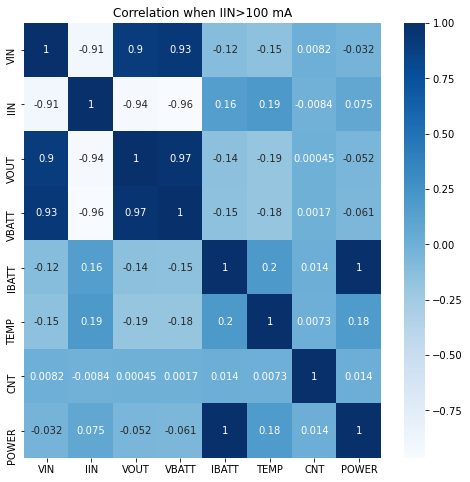

In [23]:
# master_table correlation matrix 
# calculate the correlation matrix
corr_large = DF_IIN_large.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title('Correlation when IIN>100 mA')
sns.heatmap(corr_large, 
        xticklabels=corr_large.columns,
        yticklabels=corr_large.columns, annot=True, cmap= 'Blues',ax=ax)

Studiando la distribuzione dei valori di : VBATT, VOUT, POWER e IBATT quando la corrente d'ingresso lato caricabatteria è superiore à 100 mA. I punti indicano le ouliers invece il box blu indica la distirbuzione normale. Si veda nella cella successiva

Text(0.5, 1.0, 'La distribuzione di IBATT mentre IIN>100 mA')

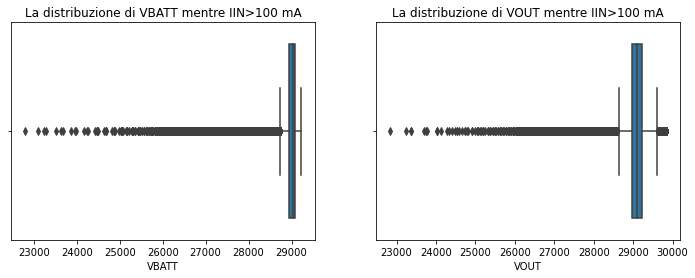

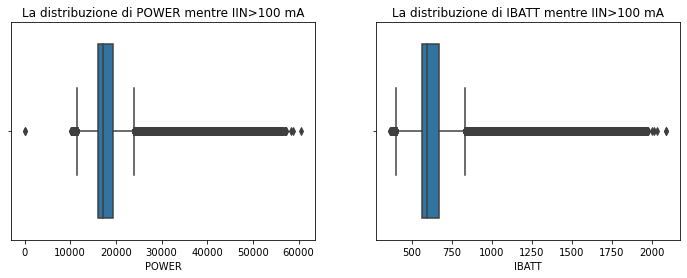

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN_large['VBATT'])
plt.title('La distribuzione di VBATT mentre IIN>100 mA')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN_large['VOUT'])
plt.title('La distribuzione di VOUT mentre IIN>100 mA')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN_large['POWER'])
plt.title('La distribuzione di POWER mentre IIN>100 mA')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN_large['IBATT'])
plt.title('La distribuzione di IBATT mentre IIN>100 mA')

Text(0.5, 1.0, 'La distribuzione di IIN mentre IIN>100 mA')

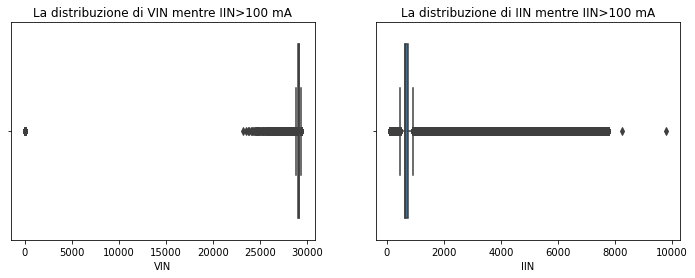

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN_large['VIN'])
plt.title('La distribuzione di VIN mentre IIN>100 mA')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN_large['IIN'])
plt.title('La distribuzione di IIN mentre IIN>100 mA')

La cella successiva rappresenta quando IIN>8000 mA, quali sono gli host che hanno avuto questa condizione

In [69]:
test=DF_IIN_large[DF_IIN_large.IIN>8000]
test

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
1559906,2020-11-01 19:32:22,24690,8254,26482,26470,692,255,516248,18317,19:32:22,2020-11-01,814U01M70613
1559987,2020-11-01 20:52:10,24676,9796,26482,26468,647,260,516329,17124,20:52:10,2020-11-01,814U01M70613


##### La cella successiva rappresenta quando VIN è 0 mentre IIN diverso da zero,  vogliamo chiedere se questi casi sono giusti o no?

In [29]:
test=DF_IIN_large[DF_IIN_large.VIN==0]
test.head(5)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
135008,2020-10-31 11:06:55,0,614,29097,29138,545,285,6749,15880,11:06:55,2020-10-31,814U01M70180
342803,2020-10-31 08:12:34,0,743,29263,29142,684,300,150650,19262,08:12:34,2020-10-31,814U01M70410
426655,2020-10-31 07:22:06,0,636,28848,28970,556,245,355154,16107,07:22:06,2020-10-31,814U01M70492
1130909,2020-11-01 11:47:48,0,688,29097,29137,568,295,8204,16549,11:47:48,2020-11-01,814U01M70180
1130910,2020-11-01 11:48:47,0,635,29097,29136,627,295,8205,18268,11:48:47,2020-11-01,814U01M70180


Gli host che hanno avuto questa condizione sono nella seguente cella 

In [27]:
c=[c for c in test.host_id.unique()]
c

['814U01M70180',
 '814U01M70410',
 '814U01M70492',
 '814U01M70524',
 '814U01M70468',
 '814U01M70928',
 '814U01M70321',
 '814U01M70330']

### Studiando l'anomalia di VIN ==> se VIN meno di 24 e diverso di  zero && IIN>100 mA

In [32]:
DF_IIN_large_less24=DF_IIN_large[(DF_IIN_large.VIN<24000)&(DF_IIN_large.VIN>0)]
DF_IIN_large_less24 #

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
1620515,2020-11-01 06:42:49,23591,7147,23245,23091,809,220,2,18680,06:42:49,2020-11-01,814U01M70674
2346729,2020-11-02 06:29:00,23242,7004,22829,22781,712,195,1,16220,06:29:00,2020-11-02,814U01M70401
2346730,2020-11-02 06:29:00,23753,6995,23369,23286,681,205,2,15857,06:29:00,2020-11-02,814U01M70401
5543544,2020-11-05 17:45:55,23833,7220,23369,23235,792,150,2,18402,17:45:55,2020-11-05,814U01M70600


è chiaro che VBATT e VOUT sono sempre stati 23 V per i 4 casi 

In [33]:
c=[c for c in DF_IIN_large_less24.host_id.unique()]
c

['814U01M70674', '814U01M70401', '814U01M70600']

### Studiando i casi quando VIN: meno di 24 e superiore à 0 su tutto il dataset 

In [34]:
tot_less24=my_Data[(my_Data.VIN<24000) & (my_Data.VIN>0)]
tot_less24=tot_less24[['VIN','IIN','VOUT','VBATT','IBATT','TEMP','POWER','time','date','host_id']]
tot_less24

,VIN,IIN,VOUT,VBATT,IBATT,TEMP,POWER,time,date,host_id
1910,13538,-14,28682,28918,546,225,15789,07:25:33,2020-10-31,814U01M70009
4835,8482,-12,28682,28817,713,240,20546,07:36:21,2020-10-31,814U01M700106
9196,14920,-14,28973,28870,591,230,17062,07:15:44,2020-10-31,814U01M700118
10680,23398,-12,28765,28946,543,235,15717,07:38:02,2020-10-31,814U01M700119
12117,21543,-13,29097,29007,572,250,16592,07:17:10,2020-10-31,814U01M70012
...,...,...,...,...,...,...,...,...,...,...
5952210,19548,-14,28890,28923,532,160,15387,07:31:02,2020-11-05,814U01M71063
5972689,6883,-14,28931,28856,560,165,16159,07:32:48,2020-11-05,814U01M71114
5988809,16305,-14,29180,28866,708,160,20437,07:38:18,2020-11-05,814U01M71136
6000513,21400,-14,29222,28933,577,175,16694,07:44:35,2020-11-05,814U01M71145


Studiando la distribuzione dei valori di : VBATT, VOUT, POWER e IBATT quando la corrente d'ingresso lato caricabatteria è superiore à 100 mA è la tensione di ingresso: 0< VIN < 24V. I punti indicano le ouliers invece il box blu indica la distirbuzione normale. Si veda nella cella successiva

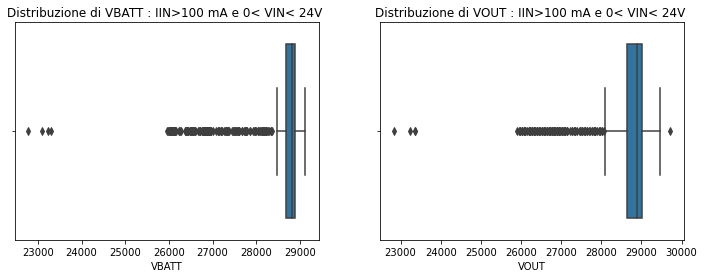

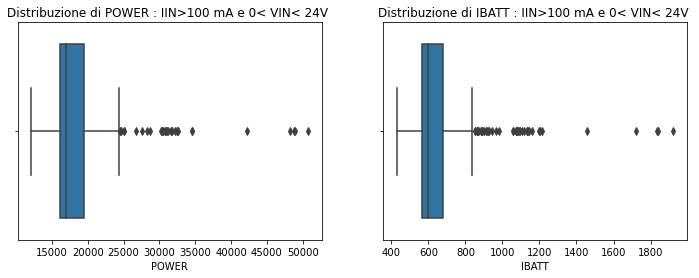

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=tot_less24['VBATT'])
plt.title('Distribuzione di VBATT : IIN>100 mA e 0< VIN< 24V ')
plt.subplot(1,2,2)
sns.boxplot(x=tot_less24['VOUT'])
plt.title('Distribuzione di VOUT : IIN>100 mA e 0< VIN< 24V ')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=tot_less24['POWER'])
plt.title('Distribuzione di POWER : IIN>100 mA e 0< VIN< 24V ')
fig.subplots_adjust(hspace=1.5)
plt.subplot(1,2,2)
sns.boxplot(x=tot_less24['IBATT'])
plt.title('Distribuzione di IBATT : IIN>100 mA e 0< VIN< 24V ')
plt.show()

Text(0.5, 1.0, 'Distribuzione di IIN : IIN>100 mA e 0< VIN< 24V')

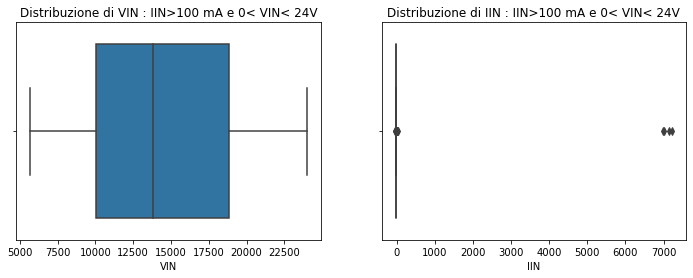

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=tot_less24['VIN'])
plt.title('Distribuzione di VIN : IIN>100 mA e 0< VIN< 24V')
plt.subplot(1,2,2)
sns.boxplot(x=tot_less24['IIN'])
plt.title('Distribuzione di IIN : IIN>100 mA e 0< VIN< 24V')

Il numero degli host che hanno avuto IIN>100 mA e 0< VIN< 24V  nel nostro Master Tabel sono 514 su 743

In [70]:
c=[c for c in tot_less24.host_id.unique()]
len(c)

514

### Studiando la durata della carica della batteria per ogni dispositivo 


Abbiamo selezionato quando IIN è stata superiore a 5500 : perchè sapiamo che per la curva ideale IIN deve raggiungere il valore 7000 mA solo quando l'illuminazione pubblica viene accesa, quindi alle 17:00

In [43]:
Col=['DATE', 'VIN','IIN', 'VOUT',  'VBATT',  'IBATT',  'TEMP',  'CNT',  'POWER',  'time',  'date',  'host_id']
DF_IIN_7000=my_Data[my_Data.IIN>6000]
DF_IIN_7000=DF_IIN_7000[Col]
DF_IIN_7000=DF_IIN_7000.reset_index(drop=True)
DF_IIN_7000

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
0,2020-10-31 17:37:15,27552,7007,27063,27031,582,225,13568,15732,17:37:15,2020-10-31,814U01M70006
1,2020-10-31 17:38:14,27820,6995,27312,27288,604,230,13569,16481,17:38:14,2020-10-31,814U01M70006
2,2020-10-31 17:39:14,27898,6978,27395,27363,734,235,13570,20084,17:39:14,2020-10-31,814U01M70006
3,2020-10-31 17:40:13,27923,6974,27437,27390,715,240,13571,19583,17:40:13,2020-10-31,814U01M70006
4,2020-10-31 17:41:12,27928,7008,27437,27385,621,245,13572,17006,17:41:12,2020-10-31,814U01M70006
...,...,...,...,...,...,...,...,...,...,...,...,...
322785,2020-11-05 18:28:36,28216,7093,27894,27726,683,260,15131,18936,18:28:36,2020-11-05,814U01M71146
322786,2020-11-05 18:29:35,28300,7183,27977,27808,635,260,15132,17658,18:29:35,2020-11-05,814U01M71146
322787,2020-11-05 18:30:34,28386,6987,28060,27908,582,265,15133,16242,18:30:34,2020-11-05,814U01M71146
322788,2020-11-05 18:31:34,28556,7109,28267,28083,597,265,15134,16765,18:31:34,2020-11-05,814U01M71146


##### Studiando la correlazione abbiamo trovato che quando IIN>7000 mA : solo IBATT e POWER sono correlati positivamente con la temperatura. Nella cella successiva vediamo la matrice di correlazione 

<AxesSubplot:title={'center':'IIN>5500 mA'}>

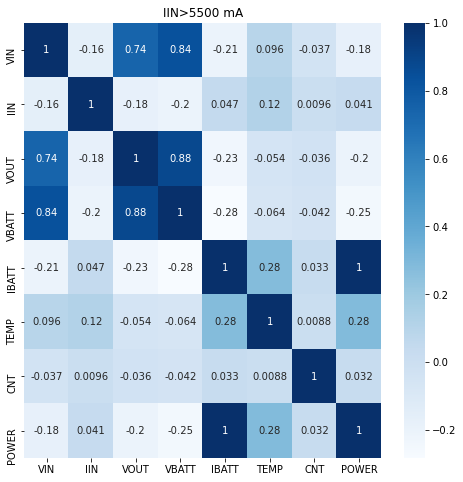

In [41]:
# master_table correlation matrix 
# calculate the correlation matrix
corr_7000 = DF_IIN_7000.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title('IIN>5500 mA')
sns.heatmap(corr_7000, 
        xticklabels=corr_7000.columns,
        yticklabels=corr_7000.columns, annot=True, cmap= 'Blues',ax=ax)

Studiando la distribuzione dei valori di : VBATT, VOUT, POWER e IBATT quando la corrente d'ingresso lato caricabatteria è superiore à 7000 mA. I punti indicano le ouliers invece il box blu indica la distirbuzione normale. Si veda nella cella successiva

Text(0.5, 1.0, 'Distribuzione di IBATT mentre IIN>6000 mA')

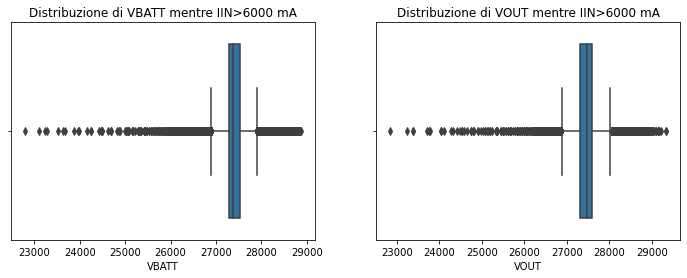

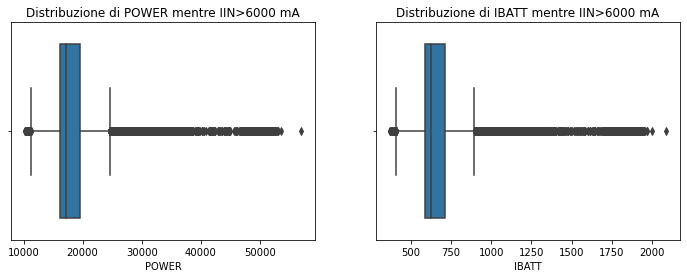

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN_7000['VBATT'])
plt.title('Distribuzione di VBATT mentre IIN>6000 mA')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN_7000['VOUT'])
plt.title('Distribuzione di VOUT mentre IIN>6000 mA')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=DF_IIN_7000['POWER'])
plt.title('Distribuzione di POWER mentre IIN>6000 mA')
plt.subplot(1,2,2)
sns.boxplot(x=DF_IIN_7000['IBATT'])
plt.title('Distribuzione di IBATT mentre IIN>6000 mA')

Studiando la distribuzione dei valori di : VIN, IIN e TEMP quando la corrente d'ingresso lato caricabatteria è superiore à 7000 mA. I punti indicano le ouliers invece il box blu indica la distirbuzione normale. Si veda nella cella successiva

Text(0.5, 1.0, 'Distribuzione di TEMP mentre IIN>6000 mA')

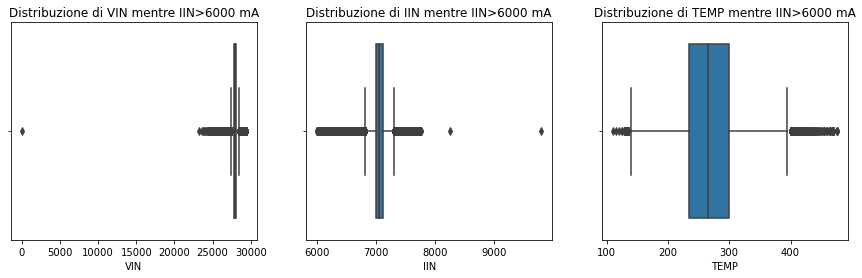

In [72]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
ax =sns.boxplot(x=DF_IIN_7000['VIN'])
plt.title('Distribuzione di VIN mentre IIN>6000 mA')
plt.subplot(1,3,2)
ax =sns.boxplot(x=DF_IIN_7000['IIN'])
plt.title('Distribuzione di IIN mentre IIN>6000 mA')
plt.subplot(1,3,3)
ax =sns.boxplot(x=DF_IIN_7000['TEMP'])
plt.title('Distribuzione di TEMP mentre IIN>6000 mA')

In [84]:
test=DF_IIN_7000[DF_IIN_7000.IIN>8000]
test

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id,time_sec
84889,2020-11-01 19:32:22,24690,8254,26482,26470,692,255,516248,18317,19:32:22,2020-11-01,814U01M70613,70342
84895,2020-11-01 20:52:10,24676,9796,26482,26468,647,260,516329,17124,20:52:10,2020-11-01,814U01M70613,75130


In [ ]:
# plt.figure(figsize=(15,4))
# plt.subplot(1,3,1)
# ax =sns.boxplot(x=DF_IIN_7000['date'], y=DF_IIN_7000['VIN'])
# ax.set_xticklabels(list_date, rotation=30)
# plt.subplot(1,3,2)
# ax =sns.boxplot(x=DF_IIN_7000['date'], y=DF_IIN_7000['IIN'])
# ax.set_xticklabels(list_date, rotation=30)
# plt.subplot(1,3,3)
# ax =sns.boxplot(x=DF_IIN_7000['date'], y=DF_IIN_7000['TEMP'])
# ax.set_xticklabels(list_date, rotation=30)

[Text(0, 0, '2020-10-31'),
 Text(1, 0, '2020-11-01'),
 Text(2, 0, '2020-11-02'),
 Text(3, 0, '2020-11-03'),
 Text(4, 0, '2020-11-04'),
 Text(5, 0, '2020-11-05')]

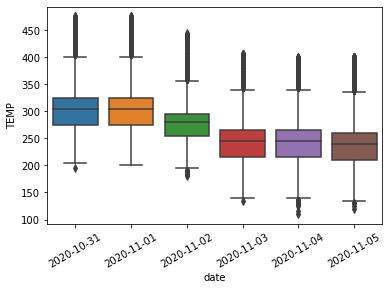

In [44]:
ax = sns.boxplot(x=DF_IIN_7000['date'], y=DF_IIN_7000['TEMP'])
ax.set_xticklabels(list_date, rotation=30)

In [ ]:
# ax = sns.boxplot(x=DF_IIN_7000['date'], y=DF_IIN_7000['IIN'])
# ax.set_xticklabels(list_date, rotation=30)

Conversione del tempo dal formato '%H:%M:%S' in secondi totali e mettiamo questo valore ricavato nella colonna 'time_sec'

In [45]:
DF_IIN_7000['time']=[datetime.datetime.strptime(x,'%H:%M:%S').time() for x in DF_IIN_7000['time']]
DF_IIN_7000['time_sec']=[sum([x.hour*3600,x.minute*60,x.second]) for x in DF_IIN_7000['time']]

In [46]:
DF_IIN_7000['time_sec']

0         63435
1         63494
2         63554
3         63613
4         63672
          ...  
322785    66516
322786    66575
322787    66634
322788    66694
322789    66753
Name: time_sec, Length: 322790, dtype: int64

Selezioniamo il Max e il Min di IIN e il 'time_sec' per ogni host e ogni giorno e facciamo la differenza per avere la durata del caricamento in secondi

In [47]:
DF_IIN_7000_max=DF_IIN_7000.groupby(['date','host_id']).max()
DF_IIN_7000_max=DF_IIN_7000_max.reset_index(level=['date','host_id'], drop=False)
DF_IIN_7000_max

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec
0,2020-10-31,814U01M70006,2020-10-31 18:34:27,28885,7036,28350,28315,734,325,13626,20084,18:34:27,66867
1,2020-10-31,814U01M70009,2020-10-31 18:27:12,28911,7084,28060,28318,738,330,592086,20221,18:27:12,66432
2,2020-10-31,814U01M70010,2020-10-31 18:27:53,28937,7083,28558,28405,744,335,584864,20402,18:27:53,66473
3,2020-10-31,814U01M700106,2020-10-31 18:33:14,28867,7118,28143,28333,748,335,574899,20451,18:33:14,66794
4,2020-10-31,814U01M70011,2020-10-31 18:32:42,29018,7211,28475,28352,752,380,106864,20701,18:32:42,66762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,2020-11-05,814U01M71142,2020-11-05 18:27:19,28760,7130,28226,28220,820,265,372084,22339,18:27:19,66439
4022,2020-11-05,814U01M71143,2020-11-05 18:29:38,28658,7028,28475,28200,742,260,367527,20256,18:29:38,66578
4023,2020-11-05,814U01M71144,2020-11-05 18:33:02,28950,7054,28599,28517,796,260,370413,21859,18:33:02,66782
4024,2020-11-05,814U01M71145,2020-11-05 18:29:06,29025,7088,28890,28608,766,260,381513,20948,18:29:06,66546


In [74]:
test=DF_IIN_7000_max[DF_IIN_7000_max.host_id=='814U01M70019']
test

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec,durata
10,2020-10-31,814U01M70019,2020-10-31 18:44:36,29148,7084,28682,28663,705,340,63510,19324,18:44:36,67476,3598
1355,2020-11-02,814U01M70019,2020-11-02 18:37:51,29140,7052,28682,28658,562,305,66432,15790,18:37:51,67071,118
2028,2020-11-03,814U01M70019,2020-11-03 18:38:01,29012,7077,28516,28510,702,275,67896,19319,18:38:01,67081,3481
2695,2020-11-04,814U01M70019,2020-11-04 18:38:23,29150,7063,28724,28693,725,270,69360,19946,18:38:23,67103,3599
3363,2020-11-05,814U01M70019,2020-11-05 18:35:59,29142,7067,28724,28690,738,265,70821,20310,18:35:59,66959,3541


In [75]:
test=DF_IIN_7000_min[DF_IIN_7000_min.host_id=='814U01M70019']
test

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec,diff_maxmin_IIN
10,2020-10-31,814U01M70019,2020-10-31 17:44:38,27603,6513,27105,27096,518,240,63449,14260,17:44:38,63878,571
1355,2020-11-02,814U01M70019,2020-11-02 18:35:53,28552,6678,28060,28035,551,300,66430,15659,18:35:53,66953,374
2028,2020-11-03,814U01M70019,2020-11-03 17:40:00,27747,7008,27271,27250,507,185,67837,14161,17:40:00,63600,69
2695,2020-11-04,814U01M70019,2020-11-04 17:38:24,27526,6506,27063,27040,509,185,69299,14515,17:38:24,63504,557
3363,2020-11-05,814U01M70019,2020-11-05 17:36:58,27747,6572,27271,27255,527,180,70761,14453,17:36:58,63418,495


In [48]:
DF_IIN_7000_min=DF_IIN_7000.groupby(['date','host_id']).min()
DF_IIN_7000_min=DF_IIN_7000_min.reset_index(level=['date','host_id'], drop=False)
DF_IIN_7000_min

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec
0,2020-10-31,814U01M70006,2020-10-31 17:37:15,27552,6958,27063,27031,532,225,13568,14576,17:37:15,63435
1,2020-10-31,814U01M70009,2020-10-31 17:27:16,27715,6983,26897,27175,532,230,592025,14569,17:27:16,62836
2,2020-10-31,814U01M70010,2020-10-31 17:27:24,27681,7022,27312,27166,560,235,584803,15327,17:27:24,62844
3,2020-10-31,814U01M700106,2020-10-31 17:31:04,27717,7051,27022,27191,538,230,574836,14705,17:31:04,63064
4,2020-10-31,814U01M70011,2020-10-31 17:32:39,27958,6460,27395,27257,553,235,106803,15203,17:32:39,63159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,2020-11-05,814U01M71142,2020-11-05 17:25:17,27563,7039,27022,27053,542,180,372021,14961,17:25:17,62717
4022,2020-11-05,814U01M71143,2020-11-05 17:28:35,27405,6892,27229,26962,536,180,367465,14639,17:28:35,62915
4023,2020-11-05,814U01M71144,2020-11-05 17:29:44,27505,6021,27105,27026,556,165,370349,15209,17:29:44,62984
4024,2020-11-05,814U01M71145,2020-11-05 17:23:18,27577,6532,27395,27142,538,170,381446,14735,17:23:18,62598


Nella cella successiva abbiamo calcolato la differenza di IIN per ogni host e per ogni giorno

In [49]:
DF_IIN_7000_diff=DF_IIN_7000_max.IIN-DF_IIN_7000_min.IIN
DF_IIN_7000_min['diff_maxmin_IIN']=DF_IIN_7000_diff

Nella cella successiva abbiamo calcolato la durata di caricamento per ogni host e per ogni giorno. Abbiamo trovato che la durata è sempre stato al intorno di 3600 secondi cioè un'ora tranne alcuni outliers: i punti neri

In [50]:
DF_IIN_7000_durata=DF_IIN_7000_max.time_sec-DF_IIN_7000_min.time_sec
DF_IIN_7000_max['durata']=DF_IIN_7000_durata

<AxesSubplot:xlabel='time_sec'>

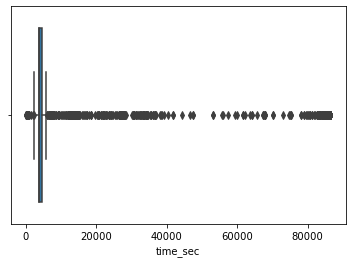

In [51]:
sns.boxplot(x=DF_IIN_7000_durata)

Nella cella successiva abbiamo selezionato quando la durata di caricamento è stata superiore à 80000 secondi cioè 22 ore

In [52]:
test1=DF_IIN_7000_max[DF_IIN_7000_max.durata>80000]
test1

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec,durata
17,2020-10-31,814U01M70034,2020-10-31 23:54:50,29191,7044,28682,28675,765,335,571976,21061,23:54:50,86090,85771
21,2020-10-31,814U01M70042,2020-10-31 23:54:53,29217,7221,28848,28767,784,340,67657,21370,23:54:53,86093,86054
22,2020-10-31,814U01M70046,2020-10-31 23:57:55,29210,7069,28807,28731,845,340,180341,23296,23:57:55,86275,86078
27,2020-10-31,814U01M70058,2020-10-31 23:56:49,29152,6977,28890,28680,796,335,12049,22010,23:56:49,86209,86003
29,2020-10-31,814U01M70061,2020-10-31 23:54:53,29217,7221,28848,28767,784,340,67657,21370,23:54:53,86093,86054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,2020-11-05,814U01M70829,2020-11-05 23:58:52,29028,7077,28516,28348,757,250,390526,20829,23:58:52,86332,86009
3882,2020-11-05,814U01M70859,2020-11-05 23:59:45,29176,7141,28807,28746,976,265,24840,26910,23:59:45,86385,86044
3949,2020-11-05,814U01M70959,2020-11-05 23:58:40,29117,7021,28350,28421,1193,260,22500,32982,23:58:40,86320,86119
3962,2020-11-05,814U01M70987,2020-11-05 23:59:28,29240,7107,29056,28860,811,260,111862,22332,23:59:28,86368,86090


Nella cella successiva troviamo il numero degli host che hanno avuto una durata di caricamento che è superiore à 80000 secondi cioè 22 ore

In [53]:
c=[c for c in test1.host_id.unique()]
len(c)

99

Nella cella successiva troviamo un esempio di un host '814U01M70006' che ha avuto una durata di caricamento che è superiore à 80000 secondi cioè 22 ore

In [54]:
test=DF_IIN_7000_max[DF_IIN_7000_max.host_id=='814U01M70829']
test

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec,durata
510,2020-10-31,814U01M70829,2020-10-31 23:48:07,28885,7141,28309,28173,795,310,383161,21928,23:48:07,85687,85407
1185,2020-11-01,814U01M70829,2020-11-01 23:59:56,28936,7061,28392,28230,767,315,384644,21100,23:59:56,86396,86229
1857,2020-11-02,814U01M70829,2020-11-02 23:56:06,29163,7123,28641,28475,723,285,386111,20160,23:56:06,86166,84055
2524,2020-11-03,814U01M70829,2020-11-03 23:46:29,28981,7038,28475,28308,758,245,387572,20899,23:46:29,85589,84648
3193,2020-11-04,814U01M70829,2020-11-04 23:54:36,29161,7093,28724,28555,799,250,389051,21902,23:54:36,86076,86064
3865,2020-11-05,814U01M70829,2020-11-05 23:58:52,29028,7077,28516,28348,757,250,390526,20829,23:58:52,86332,86009


Nella cella successiva abbiamo fatto il grafico della temperatura in funzione della durata di caricamento

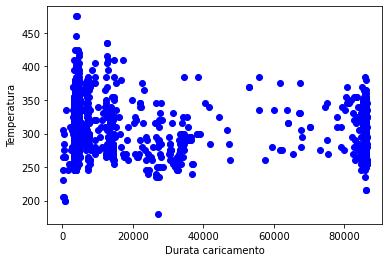

In [55]:
plt.figure( )
plt.plot(DF_IIN_7000_max.durata,DF_IIN_7000_max.TEMP,'bo')
plt.xlabel('Durata caricamento')
plt.ylabel('Temperatura')
plt.show()

#### Abbiamo deciso di studiare gli host che hanno avuto la corrente d'ingresso IIN > 5500 mA dopo le ore 22 per ogni giorno

## IIN> 5500 Dopo le 22 

In [56]:
DF_7000_dopo22=DF_IIN_7000[DF_IIN_7000.time_sec>79000]
DF_7000_dopo22.head(10)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id,time_sec
1256,2020-10-31 21:56:52,27986,6985,27520,27550,708,265,571856,19505,21:56:52,2020-10-31,814U01M70034,79012
1257,2020-10-31 22:02:46,27973,6968,27520,27545,566,260,571862,15590,22:02:46,2020-10-31,814U01M70034,79366
1258,2020-10-31 22:08:40,27981,6964,27520,27542,673,260,571868,18535,22:08:40,2020-10-31,814U01M70034,79720
1259,2020-10-31 22:14:34,27978,6945,27520,27543,646,260,571874,17792,22:14:34,2020-10-31,814U01M70034,80074
1260,2020-10-31 22:20:28,27971,6957,27520,27540,629,260,571880,17322,22:20:28,2020-10-31,814U01M70034,80428
1261,2020-10-31 22:26:22,27972,6961,27520,27533,616,260,571886,16960,22:26:22,2020-10-31,814U01M70034,80782
1262,2020-10-31 22:32:16,27973,6935,27520,27540,602,260,571892,16579,22:32:16,2020-10-31,814U01M70034,81136
1263,2020-10-31 22:38:09,27971,6933,27520,27537,618,260,571898,17017,22:38:09,2020-10-31,814U01M70034,81489
1264,2020-10-31 22:44:03,27972,6967,27520,27541,643,260,571904,17708,22:44:03,2020-10-31,814U01M70034,81843
1265,2020-10-31 22:49:57,27972,6947,27520,27536,748,260,571910,20596,22:49:57,2020-10-31,814U01M70034,82197


Abbiamo trovato che solo 111 host hanno avuto la corrente d'ingresso superiore à 5500 mA dopo le ore 22. 
    
Vi mandiamo il file CSV dove tutti gli host sono indicati.


In [58]:
c=[c for c in DF_7000_dopo22.host_id.unique()]
len(c)

111

In [57]:
DF_7000_dopo22.to_csv('7000_dopo22.csv',sep=';', index=False)

In [59]:
my_Data['time']=[datetime.datetime.strptime(x,'%H:%M:%S').time() for x in my_Data['time']]
pd.plotting.register_matplotlib_converters()
start=min(my_Data['time'])
end=max(my_Data['time'])
interval=[datetime.time(i, 0) for i in range(start.hour, end.hour+1)]

#### Nella cella successiva facciamo il plot di alcuni host che hanno presentato una anomalia cioè IIN> 5500 dope le ore 22: abbiamo preso come esempio l'host 814U01M70034

<Figure size 432x288 with 0 Axes>

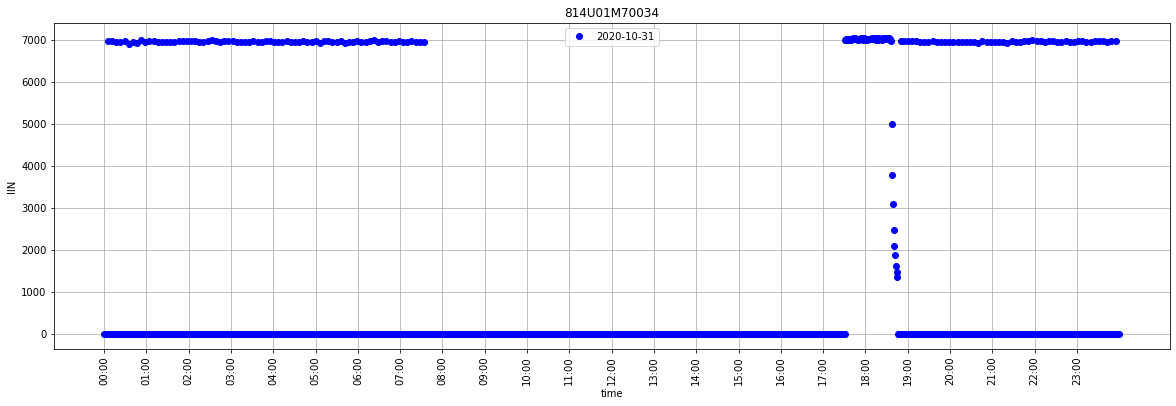

<Figure size 432x288 with 0 Axes>

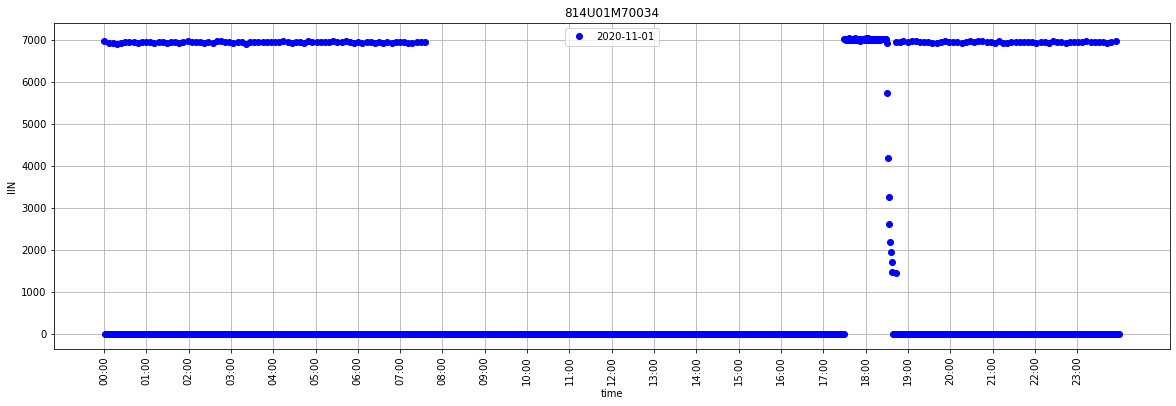

<Figure size 432x288 with 0 Axes>

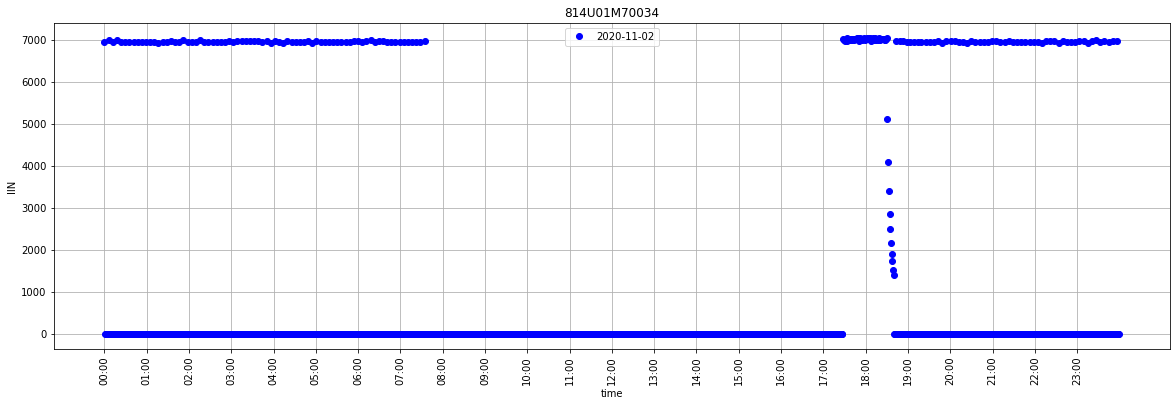

<Figure size 432x288 with 0 Axes>

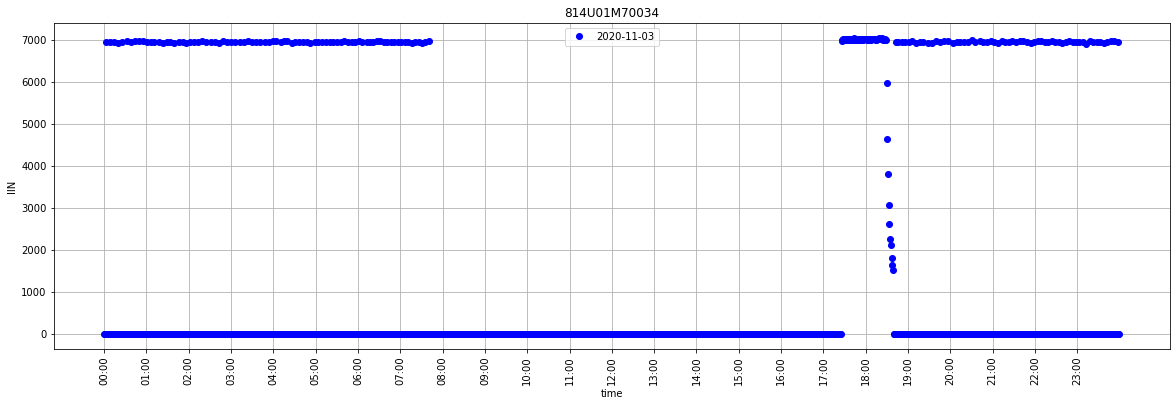

<Figure size 432x288 with 0 Axes>

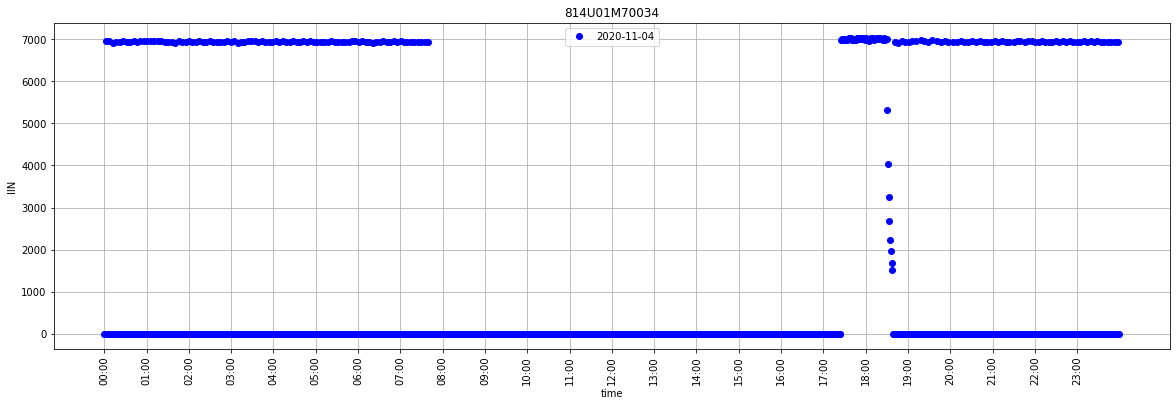

<Figure size 432x288 with 0 Axes>

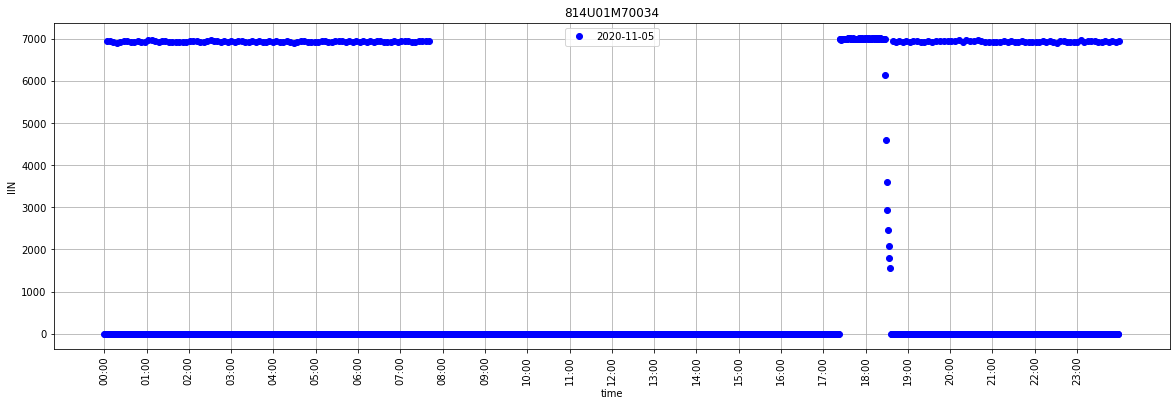

In [60]:
host='814U01M70034'
for i, date in enumerate(list_date): 
    plt.figure(i)
    fig, ax= plt.subplots(figsize=(20,6))
    df=my_Data[(my_Data.date==date)& (my_Data.host_id==host)]
    #ax1.set_title('Temperature and IIN behavior per day {}'.format(date))
    plt.plot(df['time'], df['IIN'],'bo', label=date)
    plt.ylabel('IIN')
    plt.title(host)
    plt.xticks(interval, rotation=90)
    plt.grid()
    plt.legend()
    #ax1.set_xticklabels(interval,rotation=90)
    plt.savefig('./anomali/IINVsTime{}.png'.format(date))
    plt.show()

In [61]:
new_data=my_Data[my_Data.host_id=='814U01M71106']
new_data=new_data[['VIN','IIN','VOUT','VBATT','IBATT','TEMP','time','date','host_id']]
new_data.to_csv('1106.csv',sep=';',index=False)

In [ ]:
new_data=my_Data[my_Data.host_id=='814U01M70107')]
new_data=new_data[['VIN','IIN','VOUT','VBATT','IBATT','TEMP','time','date','host_id']]
new_data.to_csv('0107.csv',sep=';',index=False)

In [97]:
test=dati[(dati.host_id=='814U01M71106')&(date=='2020-11-05')]
test

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
965381,2020-10-31 00:00:14,29247,857,29595,29140,596,270,361646,17367,00:00:14,2020-10-31,814U01M71106
965382,2020-10-31 00:01:13,29250,719,29637,29152,556,265,361647,16208,00:01:13,2020-10-31,814U01M71106
965383,2020-10-31 00:02:12,29236,-10,29595,29118,641,265,361648,18664,00:02:12,2020-10-31,814U01M71106
965384,2020-10-31 00:03:11,29245,-12,28848,28377,705,265,361649,20005,00:03:11,2020-10-31,814U01M71106
965385,2020-10-31 00:04:11,29296,-13,28433,27972,691,265,361650,19328,00:04:11,2020-10-31,814U01M71106
...,...,...,...,...,...,...,...,...,...,...,...,...
5969297,2020-11-05 23:55:30,29252,-12,27852,27437,707,180,370408,19397,23:55:30,2020-11-05,814U01M71106
5969298,2020-11-05 23:56:29,29248,-13,27728,27296,611,180,370409,16677,23:56:29,2020-11-05,814U01M71106
5969299,2020-11-05 23:57:28,27996,7100,27977,27598,696,180,370410,19208,23:57:28,2020-11-05,814U01M71106
5969300,2020-11-05 23:58:27,29241,1093,29595,29125,558,180,370411,16251,23:58:27,2020-11-05,814U01M71106


In [89]:
c=[ c for c in dati.date.unique()]
c

['2020-10-31',
 '2020-11-01',
 '2020-11-02',
 '2020-11-03',
 '2020-11-04',
 '2020-11-05']

In [85]:
dati.head(3)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
0,2020-10-31 00:00:32,29167,618,29097,29066,795,265,12497,23107,00:00:32,2020-10-31,814U01M70006
1,2020-10-31 00:01:31,29167,619,29097,29048,576,265,12498,16731,00:01:31,2020-10-31,814U01M70006
2,2020-10-31 00:02:30,29166,691,29097,29065,746,265,12499,21682,00:02:30,2020-10-31,814U01M70006


Abbiamo anche selezionato gli host 814U01M71106 e 814U01M70107. Vi alleghiamo un file csv per ciascuno di questi host

## I casi di caricamento chi ha durato  meno di un'ora 

Nella cella successiva abbiamo selezionato gli host che hanno avuto una durata di caraicamento meno di un'ora. A bbiamo trovato che la maggiore parte dei host hanno avuto una durata al intorno di 3600 secondi tranne alcuni outliers

[Text(0, 0, '2020-10-31'),
 Text(1, 0, '2020-11-01'),
 Text(2, 0, '2020-11-02'),
 Text(3, 0, '2020-11-03'),
 Text(4, 0, '2020-11-04'),
 Text(5, 0, '2020-11-05')]

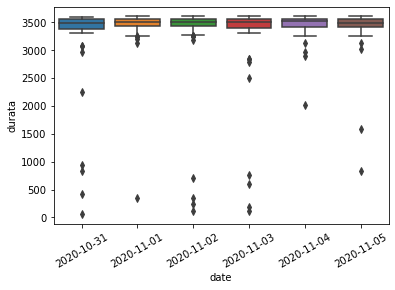

In [62]:
DF_Carica_menoora=DF_IIN_7000_max[DF_IIN_7000_max.durata<3600]
ax = sns.boxplot(x=DF_Carica_menoora['date'], y=DF_Carica_menoora['durata'])
ax.set_xticklabels(list_date, rotation=30)

Nella cella successiva abbiamo selezionato gli host che hanno avuto una durata di caricamento di meno di un'ora. Abbiamo trovato che la maggior parte degli host hanno avuto una durata al intorno di 3600 secondi tranne alcuni outliers

In [63]:
c=[ c for c in DF_Carica_menoora.host_id.unique()]
len(c)

231

## I casi di caricamento chi ha durato meno di 2000 secondi (quasi mezz'ora)

Nella cella successiva abbiamo selezionato gli host che hanno avuto una durata di caraicamento mno di 2000 secondi. Abbiamo trovato che solo 10 host hanno avuto questa condizione che sono indicati nel out [118]. Solo 5 giorni su 6 hanno avuto questo comportamento. la maggior parte dgli host hanno avuto una durata al intorno di 400 secondi  fino a 850 secondi. 

In [64]:
DF_Carica_meno30=DF_IIN_7000_max[DF_IIN_7000_max.durata<2000]
c=[ c for c in DF_Carica_meno30.host_id.unique()]
print(len(c))
c

10


['814U01M70098',
 '814U01M70316',
 '814U01M70412',
 '814U01M70778',
 '814U01M70019',
 '814U01M70024',
 '814U01M70101',
 '814U01M70251',
 '814U01M70360',
 '814U01M70321']

In [65]:
list_dat=[c for c in DF_Carica_meno30.date.unique()]
list_dat

['2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-05']

[Text(0, 0, '2020-10-31'),
 Text(1, 0, '2020-11-01'),
 Text(2, 0, '2020-11-02'),
 Text(3, 0, '2020-11-03'),
 Text(4, 0, '2020-11-05')]

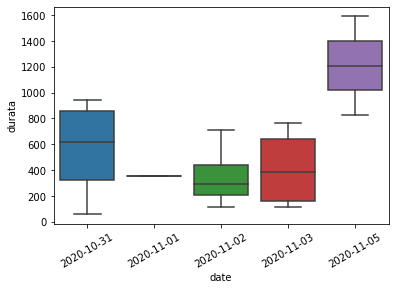

In [66]:
ax = sns.boxplot(x=DF_Carica_meno30['date'], y=DF_Carica_meno30['durata'])
ax.set_xticklabels(list_dat, rotation=30)

In [73]:
DF_Carica_meno30

,date,host_id,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,time_sec,durata
45,2020-10-31,814U01M70098,2020-10-31 18:45:00,28950,7091,28516,28450,772,335,383061,21570,18:45:00,67500,943
163,2020-10-31,814U01M70316,2020-10-31 17:18:48,27641,7148,27188,27136,602,245,82695,16222,17:18:48,62328,59
229,2020-10-31,814U01M70412,2020-10-31 17:39:31,28756,7041,28309,28242,784,285,480669,21581,17:39:31,63571,415
486,2020-10-31,814U01M70778,2020-10-31 17:57:50,29048,7172,28392,28411,740,265,16,19957,17:57:50,64670,827
902,2020-11-01,814U01M70412,2020-11-01 17:36:32,28137,7037,27686,27605,751,275,482125,20731,17:36:32,63392,355
1355,2020-11-02,814U01M70019,2020-11-02 18:37:51,29140,7052,28682,28658,562,305,66432,15790,18:37:51,67071,118
1357,2020-11-02,814U01M70024,2020-11-02 11:33:05,28857,7008,28184,28263,918,300,577959,24864,11:33:05,41585,354
1395,2020-11-02,814U01M70101,2020-11-02 17:40:34,28066,7182,27769,27431,755,265,4875,20699,17:40:34,63634,709
1833,2020-11-02,814U01M70778,2020-11-02 09:25:47,27693,7165,26980,26960,595,265,961,16041,09:25:47,33947,236
2030,2020-11-03,814U01M70024,2020-11-03 11:44:07,28235,6978,27520,27676,616,230,579433,16993,11:44:07,42247,178


In [76]:
DF_Carica_meno30.shape[0]

15

In [ ]:
814U01M70778

In [81]:
test=dati[(dati.host_id=='814U01M70316') & (dati.date=='2020-10-31')]
test

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
242839,2020-10-31 00:00:19,29175,675,29097,29053,576,275,81640,16734,00:00:19,2020-10-31,814U01M70316
242840,2020-10-31 00:01:18,29175,673,29139,29051,676,275,81641,19638,00:01:18,2020-10-31,814U01M70316
242841,2020-10-31 00:02:17,29173,736,29097,29075,526,275,81642,15293,00:02:17,2020-10-31,814U01M70316
242842,2020-10-31 00:03:16,29175,697,29139,29073,907,275,81643,26369,00:03:16,2020-10-31,814U01M70316
242843,2020-10-31 00:04:15,29175,742,29097,29068,598,275,81644,17382,00:04:15,2020-10-31,814U01M70316
...,...,...,...,...,...,...,...,...,...,...,...,...
244297,2020-10-31 23:55:31,0,0,26275,26242,643,210,83098,16873,23:55:31,2020-10-31,814U01M70316
244298,2020-10-31 23:56:30,0,0,26275,26242,679,210,83099,17818,23:56:30,2020-10-31,814U01M70316
244299,2020-10-31 23:57:29,0,0,26275,26247,582,210,83100,15275,23:57:29,2020-10-31,814U01M70316
244300,2020-10-31 23:58:29,0,0,26275,26242,591,210,83101,15509,23:58:29,2020-10-31,814U01M70316


In [83]:
test.to_csv('814U01M70316.csv',sep=';', index=False)